In [32]:
# %load connect_select.py
# %load connect_select.py
#!/usr/bin/python
import psycopg2
import sys
import pprint
from datetime import datetime

import pandas.io.sql as sql
import pandas as pd


conn_string = "host='localhost' dbname='newsapp' user='postgres' password='postgres'"
# print the connection string we will use to connect
print ("Connecting to database\n    ->%s" % (conn_string))
 
# get a connection, if a connect cannot be made an exception will be raised here
conn = psycopg2.connect(conn_string)
# conn.cursor will return a cursor object, you can use this cursor to perform queries
cursor = conn.cursor()
# execute our Query
#cursor.execute("SELECT * FROM backend_article")
#the_frame = pdsql.read_frame("SELECT * FROM %s;" % backend_article, conn)
df_art = sql.read_sql("SELECT * FROM backend_article;", conn)
df_sent = sql.read_sql("SELECT * FROM backend_sentiment;", conn)
df_sent_seq = sql.read_sql("SELECT * FROM backend_sentiment_id_seq;", conn)
df_art_seq = sql.read_sql("SELECT * FROM backend_sentiment_id_seq;", conn)
df_table = sql.read_sql("SELECT backend_article.uniqueid, backend_article.publishedat, backend_article.url, backend_article.source, backend_sentiment.score, backend_article.text FROM backend_article INNER JOIN backend_sentiment ON backend_article.uniqueid = backend_sentiment.article;", conn)
df_ent_table = sql.read_sql("SELECT name FROM backend_entities;", conn)

df_table["publishedat"] = [d.to_pydatetime().date() for d in df_table["publishedat"]]
df_table["length"] = [len(text) for text in df_table["text"]]

source_list = list(set(df_table.source))


df_table.to_csv('df_table.csv')
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('df_table.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
df_table.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

#records = cursor.fetchall()
#pprint.pprint(records)

 


Connecting to database
    ->host='localhost' dbname='newsapp' user='postgres' password='postgres'


In [78]:
#print(df_ent_table)
#df_ent_table.groupby('name').count()
ent_count_table = df_ent_table.name.value_counts()

#print(type(ent_count_table))
print(ent_count_table[:15])
#ent_count_table_df = ent_count_table.to_frame
print(type(ent_count_table))
#ent_count_table.style

ent_count_table_df = ent_count_table.to_frame()

ent_count_table_df[:15].style
ent_count_table_df_top15 = ent_count_table_df[:15]


ent_count_table_df_top15.to_csv('ent_count_table_df_top15.csv')


President Donald Trump    204
Donald Trump              199
Trump                     175
president                 174
Grenfell Tower            168
Washington                166
Bloomberg                 149
US                        143
Thomson Reuters           133
United States             131
London                    126
U.S.                      120
Senate                    120
Theresa May               107
Russia                    100
Name: name, dtype: int64
<class 'pandas.core.series.Series'>


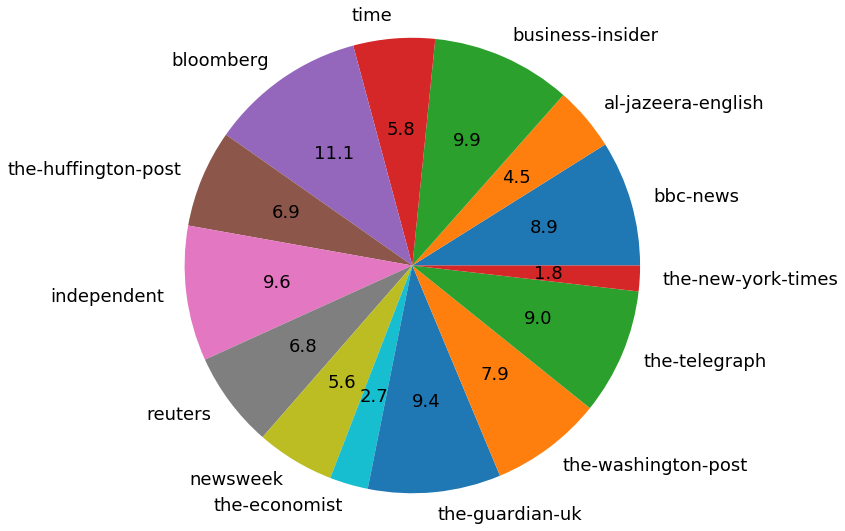

In [30]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
counts = Counter(  df_table['source'] )
mean_sent = df_table['score'].mean()

#print( c.items() )
counts.values()
plt.pie([float(v) for v in counts.values()], labels=counts, autopct='%.1f' )
matplotlib.rcParams['font.size'] = 24.0
fig = plt.gcf()
fig.set_size_inches(9,9) # or (4,4) or (5,5) or whatever
plt.axis('equal')
plt.show()

In [9]:
from collections import defaultdict
sent_dict = defaultdict(int)
for source in source_list:

    print("{0:20} {1}".format(source, (df_table.loc[df_table['source'] == source, 'score'] ).mean()))
    sent_dict[source] = df_table.loc[df_table['source'] == source, 'score'].mean()
sent_dict

the-guardian-uk      -0.20182447017857136
the-huffington-post  -0.18447811250485438
bbc-news             -0.2532608590566037
the-new-york-times   -0.20508672425925922
independent          0.375257526622456
reuters              -0.211490498960396
bloomberg            0.024141106079027367
the-washington-post  0.009314552970338978
business-insider     -0.22538084857627122
al-jazeera-english   -0.12709573029629628
time                 -0.23384169011627903
the-economist        -0.27296214987654316
the-telegraph        0.14814249864661663
newsweek             -0.21679308461818175


defaultdict(int,
            {'al-jazeera-english': -0.12709573029629628,
             'bbc-news': -0.2532608590566037,
             'bloomberg': 0.024141106079027367,
             'business-insider': -0.22538084857627122,
             'independent': 0.375257526622456,
             'newsweek': -0.21679308461818175,
             'reuters': -0.211490498960396,
             'the-economist': -0.27296214987654316,
             'the-guardian-uk': -0.20182447017857136,
             'the-huffington-post': -0.18447811250485438,
             'the-new-york-times': -0.20508672425925922,
             'the-telegraph': 0.14814249864661663,
             'the-washington-post': 0.009314552970338978,
             'time': -0.23384169011627903})

In [10]:
for index, row in df_table.iterrows():
    print (len(row['text']))

3702
3017
2422
8576
2791
1878
22536
4070
2463
5781
6394
8164
6308
2380
11428
91875
7498
2922
1265
4215
3711
23406
4931
4617
6480
5382
3696
5234
4551
9970
2447
7230
3693
5244
4351
3772
5679
6919
2044
2640
2669
6066
5022
3870
501
2907
8175
15214
4374
9242
6286
4949
5739
1850
5200
1039
3332
5911
5303
23345
5710
4816
2525
7172
6635
5549
3708
5356
3554
4850
5037
3507
6415
6199
2007
3210
6548
6433
6376
2413
2775
4767
4466
7845
4566
4698
2522
2126
3304
3902
4693
8417
4378
9135
3124
7311
1969
2581
3162
1871
2613
2862
4829
5438
3255
2735
1582
3478
2052
8270
3228
4369
4658
2608
2998
13889
4087
7800
3870
6508
959
3578
7228
1245
19158
3364
1971
2152
9132
4014
7247
5740
9425
12715
5469
7232
6144
11843
3815
51960
2785
7915
4655
1899
1934
4266
6129
3179
2388
4937
4203
2460
1017
5826
4542
1982
3400
4050
5736
1338
10279
4977
2483
1759
4802
2020
2192
2731
1263
1205
1683
6410
2686
1692
4262
2152
4533
2164
1867
7450
6488
6223
3350
7283
3294
6990
3658
3317
3996
5232
10543
291
304
2971
8569
5676
7789
15092


In [11]:
print(sorted(sent_dict.values()))

[-0.27296214987654316, -0.2532608590566037, -0.23384169011627903, -0.22538084857627122, -0.21679308461818175, -0.211490498960396, -0.20508672425925922, -0.20182447017857136, -0.18447811250485438, -0.12709573029629628, 0.009314552970338978, 0.024141106079027367, 0.14814249864661663, 0.375257526622456]


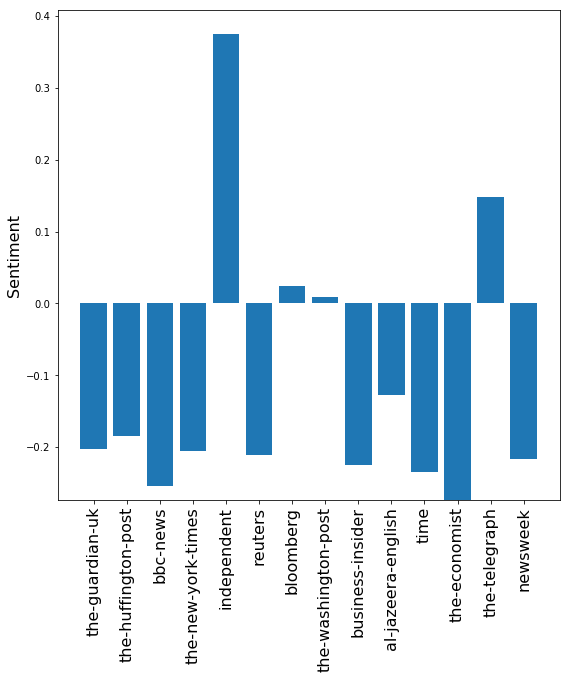

In [24]:
import matplotlib.pyplot as plt

plt.bar(range(len(sent_dict)), sent_dict.values(), align='center')
plt.xticks(range(len(sent_dict)), sent_dict.keys(), rotation='vertical', fontsize=16)
plt.ylabel('Sentiment', fontsize=16)

fig = plt.gcf()
fig.set_size_inches(9,9) # or (4,4) or (5,5) or whatever
plt.show()


In [7]:
df_table

,uniqueid,publishedat,url,source,score,text,length
0,281328927,2017-06-15,http://www.bbc.co.uk/news/world-asia-40293388,bbc-news,-0.488099,Share this withEmailFacebookMessengerMessenger...,3702
1,2948271004,2017-06-15,http://www.bbc.co.uk/news/world-australia-4028...,bbc-news,0.155371,Share this withEmailFacebookMessengerMessenger...,3017
2,3045982482,2017-06-15,http://www.bbc.co.uk/news/world-europe-40292739,bbc-news,-0.557135,Share this withEmailFacebookMessengerMessenger...,2422
3,3118373054,2017-06-14,http://www.aljazeera.com/indepth/opinion/2017/...,al-jazeera-english,-0.293017,Most Searched14 Jun 2017 12:50 GMT | Arts & Cu...,8576
4,3175515859,2017-06-15,http://www.bbc.co.uk/news/world-asia-40296509,bbc-news,-0.321397,Share this withEmailFacebookMessengerMessenger...,2791
5,3317426419,2017-06-15,http://www.bbc.co.uk/news/entertainment-arts-4...,bbc-news,0.108399,Share this withEmailFacebookMessengerMessenger...,1878
6,3442683714,2017-06-14,http://www.aljazeera.com/programmes/talktojaze...,al-jazeera-english,-0.207559,Most Searched14 Jun 2017 17:31 GMT Middle East...,22536
7,3517427313,2017-06-15,http://www.aljazeera.com/news/2017/06/qatar-fi...,al-jazeera-english,0.045082,Most Searched15 Jun 2017 17:57 GMT Middle East...,4070
8,3584057767,2017-06-15,http://www.aljazeera.com/news/2017/06/afghanis...,al-jazeera-english,0.132830,Most Searched15 Jun 2017 18:53 GMTA suicide bo...,2463
9,3643243189,2017-06-15,http://www.aljazeera.com/news/2017/06/death-to...,al-jazeera-english,-0.196300,"Most Searched15 Jun 2017 14:24 GMT Europe, Uni...",5781
